<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Sep8-9/EjercicioSep9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Datos de problema a solucionar
A un director de enfermería le gustaría utilizar las características personales de las enfermeras para desarrollar un modelo de regresión para predecir el desempeño laboral (JOBPER). Las siguientes variables están disponibles para elegir las variables independientes que se incluirán en el modelo:
* X1 = asertividad (ASRV)
* X2 = entusiasmo (ENTH)
* X3 = ambición (AMB)
* X4 = habilidades comunicativas (COMM)
* X5 = habilidades para resolver problemas (PROBÞ)
* X6 = iniciativa (INIT)

Deseamos utilizar el procedimiento paso a paso para seleccionar variables independientes de las disponibles en la tabla para construir un modelo de regresión múltiple para predecir el desempeño laboral.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Separando los Tipos de variables


In [45]:
for i in df:
  print(f'*************{ i }*************')
  print(pd.get_dummies(df[i]).head(1))
  print()

*************car_ID*************
   1    2    3    4    5    6    7    8    9    10   ...  196  197  198  199  \
0    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   200  201  202  203  204  205  
0    0    0    0    0    0    0  

[1 rows x 205 columns]

*************symboling*************
   -2  -1   0   1   2   3
0   0   0   0   0   0   1

*************CarName*************
   Nissan versa  alfa-romero Quadrifoglio  alfa-romero giulia  \
0             0                         0                   1   

   alfa-romero stelvio  audi 100 ls  audi 100ls  audi 4000  audi 5000  \
0                    0            0           0          0          0   

   audi 5000s (diesel)  audi fox  ...  volkswagen type 3  volvo 144ea  \
0                    0         0  ...                  0            0   

   volvo 145e (sw)  volvo 244dl  volvo 245  volvo 246  volvo 264gl  \
0                0            0          0          0            0   

   volvo diesel  vw dash

Empezando a definir las variables de tipo al obtener los valores de la funcion dummies

***Categoricas Binarias***
* fueltype
* aspiration
* doornumber
* enginelocation

***Categoricas nominales***
* wheelbase
* carlenght
* CarName
* carbody
* drivewheel
* enginetype
* fulsystem
* cylindernumber

***Numericas continuas***
* carwidth
* caheight
* boreratio
* stroke
* compressionratio
* price


***Numericas disretas***
* Car_ID
* Symboling
* enginesize
* horsepower
* peakrpm
* citympg
* higwaympg



#Analiza la dependencia del valor del auto como función de cada variable categorica


In [130]:
#Categoricas Binarias
CB=['fueltype','aspiration','doornumber','enginelocation']
cn=['wheelbase','carlenght','CarName','carbody','drivewheel','enginetype','fulsystem','cylindernumber']
nc=['carwidth','caheight','boreratio','stroke','compressionratio']
nd=['Car_ID','Symboling','enginesize','horsepower','peakrpm','citympg','higwaympg']

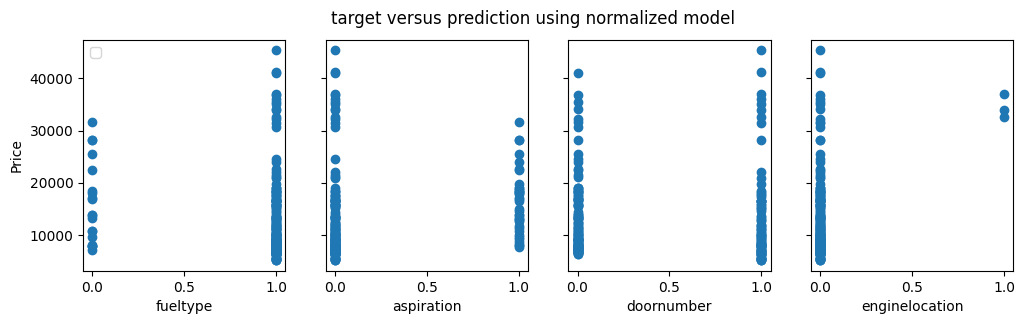

In [129]:
price=np.array(df['price']).T

fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(CB)):
  temp=np.array(pd.get_dummies(df[CB[i]])).T
  ax[i].scatter(temp[1],price)
  ax[i].set_xlabel(CB[i])
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Graficos de caracter binario vs precio")
plt.show()

KeyError: ignored

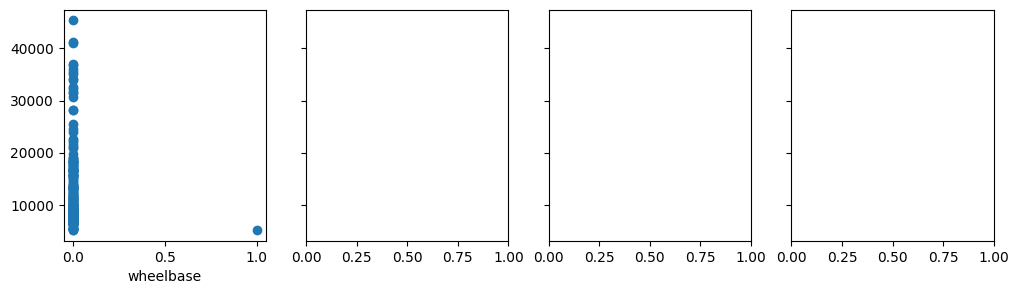

In [131]:

fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
ax[0].scatter(df[],price)
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Graficos de caracter binario vs precio")
plt.show()